In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from matplotlib import rc
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re, string
from wordcloud import WordCloud, STOPWORDS

rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

# 로지스틱회귀 모델

In [107]:
data = pd.read_csv('/Users/jeon-yewon/Downloads/증강된_데이터_1008.csv')

In [108]:
data.head(2)

,id,평점,날짜,가입기간,리뷰_교정,번역여부,호스트,답글 날짜,답글,게스트 선호,슈퍼 호스트,카테고리,지역,감정,감성
0,Chole,5.0,1주 전,7년,사진이 버스와 일치하는 경우 호스트의 안내가 매우 명확하고 위치를 쉽게 찾을 수 있...,중국어,답변 없음,답변 없음,답변 없음,X,슈퍼 호스트,B&B,서울,감사한,행복한
1,露露,5.0,1주 전,5년,집주인은 매우 잘생기고 언어가 많으며 중국어로 의사소통이 매우 원활하고 원활합니다 ...,중국어,답변 없음,답변 없음,답변 없음,X,슈퍼 호스트,B&B,서울,감사한,행복한


In [109]:
# 'Unknown' 값이 있는 행을 삭제하는 코드
data = data[data['감정'] != 'Unknown']

# 삭제된 데이터 확인
data['감정'].value_counts()

# 2단계: 데이터 전처리
# '리뷰'와 '감정' 열에 결측값이 있는 행 제거
data = data.dropna(subset=['리뷰_교정', '감정'])

# '리뷰' 열을 문자열로 변환 (숫자나 다른 타입이 있을 수 있으므로)
data['리뷰_교정'] = data['리뷰_교정'].astype(str)

# 3단계: 학습용 데이터와 테스트용 데이터 분리
X = data['리뷰_교정']  # 입력 데이터 (리뷰)
y = data['감정']  # 출력 데이터 (감정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# 4단계: TF-IDF 벡터화로 '리뷰' 텍스트 데이터를 숫자로 변환
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)  # 벡터화된 학습용 데이터
X_test_tfidf = vectorizer.transform(X_test)  # 벡터화된 테스트용 데이터

In [111]:
# 5단계: 로지스틱 회귀 모델 학습 (반복 횟수 증가 및 데이터 스케일링 추가)
model = LogisticRegression(max_iter=500, solver='lbfgs')  # 반복 횟수 500으로 증가
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500)

In [112]:
# 6단계: 예측 수행
y_pred = model.predict(X_test_tfidf)

In [113]:
# 7단계: 모델 평가
print("정확도:", accuracy_score(y_test, y_pred))
print("분류 보고서:")
print(classification_report(y_test, y_pred))

정확도: 0.7911097295617034
분류 보고서:
              precision    recall  f1-score   support

         감사한       0.83      0.89      0.86      9014
        경험적인       0.71      0.48      0.57       988
         만족한       0.73      0.83      0.78      4518
         불만족       0.78      0.74      0.76      1046
         신나는       0.96      0.80      0.87       913
        양가감정       0.67      0.37      0.48       600
        힐링되는       0.76      0.57      0.65      2223

    accuracy                           0.79     19302
   macro avg       0.78      0.67      0.71     19302
weighted avg       0.79      0.79      0.78     19302



<Figure size 1000x800 with 0 Axes>

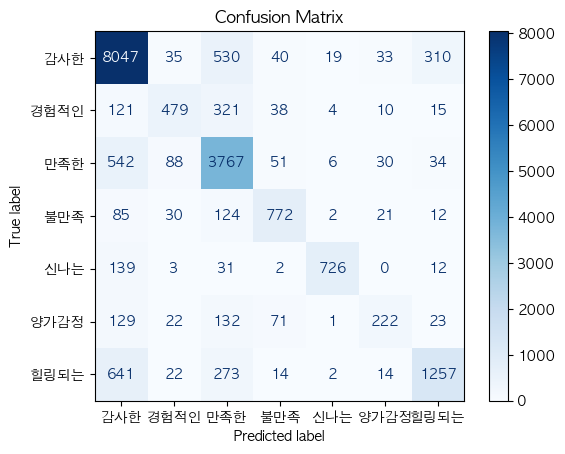

<Figure size 1000x600 with 0 Axes>

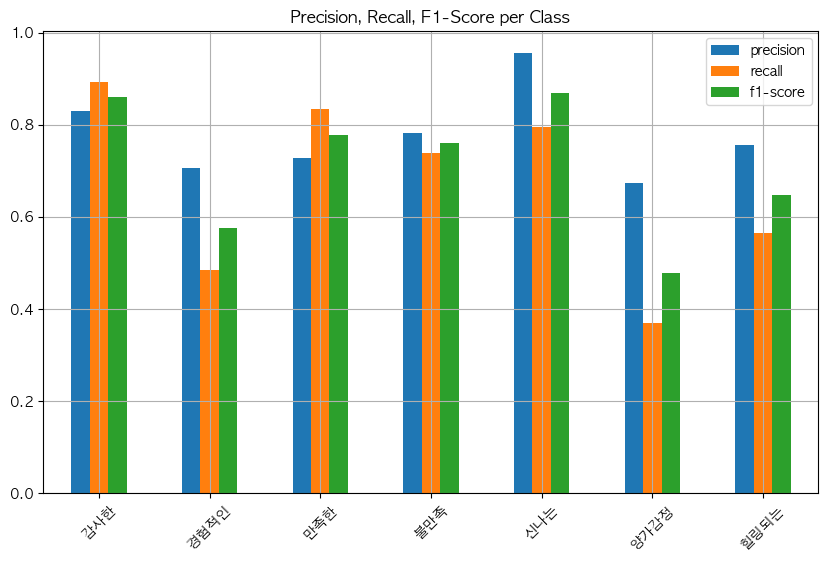

In [114]:
# 1. Confusion Matrix (혼동 행렬) 시각화
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 2. Classification Report 시각화 (precision, recall, f1-score 그래프)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 각 성능 지표의 막대 그래프 그리기
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10,6))
plt.title('Precision, Recall, F1-Score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 랜덤포레스트 모델

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [116]:
data = pd.read_csv('/Users/jeon-yewon/Downloads/증강된_데이터_1008.csv')

In [117]:
data = data[data['감정'] != 'Unknown']
data = data.dropna(subset=['리뷰_교정', '감정'])
data['리뷰_교정'] = data['리뷰_교정'].astype(str)

In [118]:
data['감정'].value_counts()

감정
감사한     44553
만족한     22858
힐링되는    11167
불만족      5396
경험적인     5028
신나는      4489
양가감정     3018
Name: count, dtype: int64

In [119]:
X = data['리뷰_교정']
y = data['감정']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
vectorizer = TfidfVectorizer(max_features=5000) 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [80]:
y_pred_rf = rf_model.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

In [81]:
print("### 랜덤 포레스트 결과 ###")
print(f"정확도: {accuracy_rf}")

### 랜덤 포레스트 결과 ###
정확도: 0.7746865609781369


In [82]:
print("분류 보고서:\n", report_rf)

분류 보고서:
               precision    recall  f1-score   support

         감사한       0.85      0.79      0.82      9014
        경험적인       0.80      0.95      0.87       988
         만족한       0.67      0.78      0.72      4518
         불만족       0.76      0.91      0.83      1046
         신나는       0.94      0.81      0.87       913
        양가감정       0.89      0.90      0.89       600
        힐링되는       0.63      0.50      0.56      2223

    accuracy                           0.77     19302
   macro avg       0.79      0.81      0.79     19302
weighted avg       0.78      0.77      0.77     19302



<Figure size 1000x800 with 0 Axes>

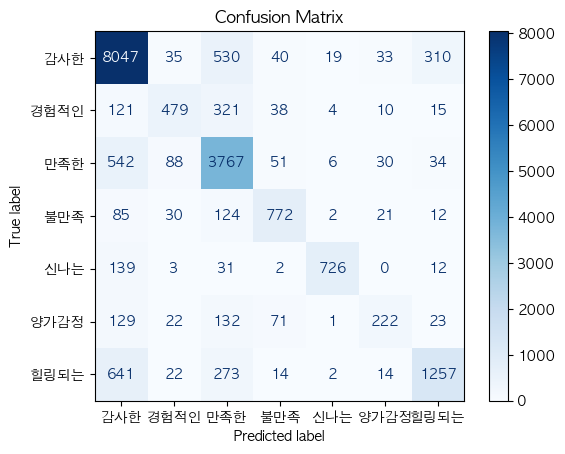

<Figure size 1000x600 with 0 Axes>

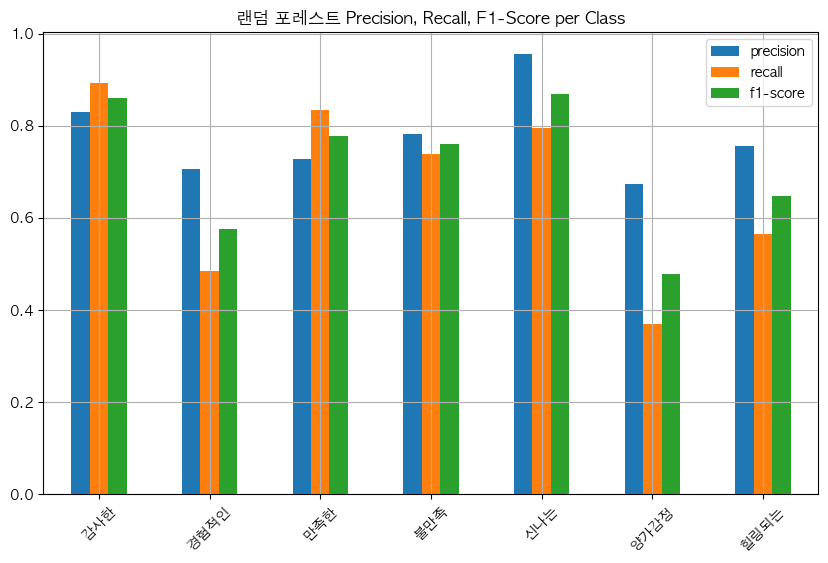

In [83]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10,6))
plt.title('랜덤 포레스트 Precision, Recall, F1-Score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 나이브 베이즈 모델

In [121]:
# 1단계: 데이터 불러오기
data = pd.read_csv('/Users/jeon-yewon/Downloads/증강된_데이터_1008.csv')

# 'Unknown' 값이 있는 행을 삭제하는 코드
data = data[data['감정'] != 'Unknown']

# 2단계: 데이터 전처리
# '리뷰'와 '감정' 열에 결측값이 있는 행 제거
data = data.dropna(subset=['리뷰_교정', '감정'])

# '리뷰' 열을 문자열로 변환 (숫자나 다른 타입이 있을 수 있으므로)
data['리뷰'] = data['리뷰_교정'].astype(str)

In [122]:
# 3단계: TF-IDF 벡터화로 텍스트 데이터를 숫자로 변환
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4단계: SMOTE를 사용해 소수 클래스 증강
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [123]:
# 5단계: TF-IDF 벡터화로 '리뷰' 텍스트 데이터를 숫자로 변환
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)  # 벡터화된 학습용 데이터
X_test_tfidf = vectorizer.transform(X_test)  # 벡터화된 테스트용 데이터

In [124]:
# 5단계: 나이브 베이즈 모델 생성 및 학습
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [125]:
# 6단계: 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_tfidf)

In [126]:
# 7단계: 정확도 및 분류 보고서 출력
print("정확도:", accuracy_score(y_test, y_pred))
print("분류 보고서:")
print(classification_report(y_test, y_pred))

정확도: 0.6350637239664283
분류 보고서:
              precision    recall  f1-score   support

         감사한       0.60      0.95      0.74      9014
        경험적인       0.54      0.12      0.19       988
         만족한       0.73      0.51      0.60      4518
         불만족       0.74      0.61      0.67      1046
         신나는       0.74      0.50      0.59       913
        양가감정       0.72      0.11      0.19       600
        힐링되는       0.86      0.05      0.10      2223

    accuracy                           0.64     19302
   macro avg       0.70      0.41      0.44     19302
weighted avg       0.68      0.64      0.58     19302



<Figure size 1000x600 with 0 Axes>

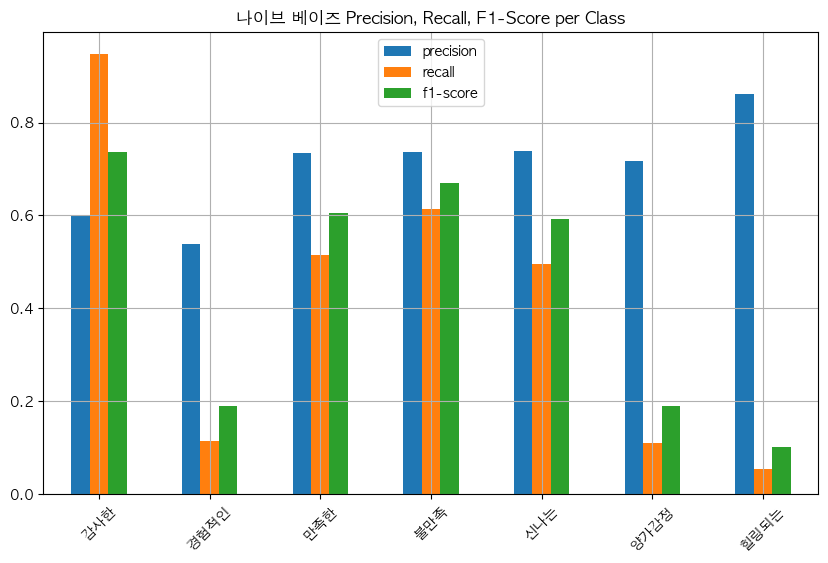

In [127]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 각 성능 지표의 막대 그래프 그리기
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10,6))
plt.title('나이브 베이즈 Precision, Recall, F1-Score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# XGBOOST 모델

In [128]:
# 1단계: 데이터 로드 및 전처리
data = pd.read_csv('/Users/jeon-yewon/Downloads/증강된_데이터_1008.csv')

# 'Unknown' 값이 있는 행을 삭제하는 코드
data = data[data['감정'] != 'Unknown']

# '리뷰'와 '감정' 열에 결측값이 있는 행 제거
data = data.dropna(subset=['리뷰_교정', '감정'])

# '리뷰' 열을 문자열로 변환
data['리뷰'] = data['리뷰_교정'].astype(str)

# 학습용 데이터와 테스트용 데이터 분리
X = data['리뷰']
y = data['감정']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# 2단계: TF-IDF 벡터화로 텍스트 데이터를 숫자로 변환
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [93]:
# 3단계: SMOTE를 사용해 소수 클래스 증강
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [94]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1단계: Label Encoding으로 y_train과 y_test를 숫자로 변환
label_encoder = LabelEncoder()

y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

In [95]:
# 2단계: XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [96]:
# 3단계: 예측
y_pred_xgb_encoded = xgb_model.predict(X_test_tfidf)

In [97]:
# 4단계: 예측된 숫자 클래스를 다시 원래 문자열 클래스로 변환
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

In [98]:
# 5단계: 성능 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"정확도: {accuracy_xgb}")
print("분류 보고서:\n", report_xgb)

정확도: 0.7443270127447933
분류 보고서:
               precision    recall  f1-score   support

         감사한       0.91      0.75      0.82      9014
        경험적인       0.39      0.87      0.54       988
         만족한       0.73      0.70      0.71      4518
         불만족       0.73      0.72      0.73      1046
         신나는       0.96      0.89      0.92       913
        양가감정       0.48      0.75      0.59       600
        힐링되는       0.62      0.72      0.67      2223

    accuracy                           0.74     19302
   macro avg       0.69      0.77      0.71     19302
weighted avg       0.79      0.74      0.76     19302



<Figure size 1000x600 with 0 Axes>

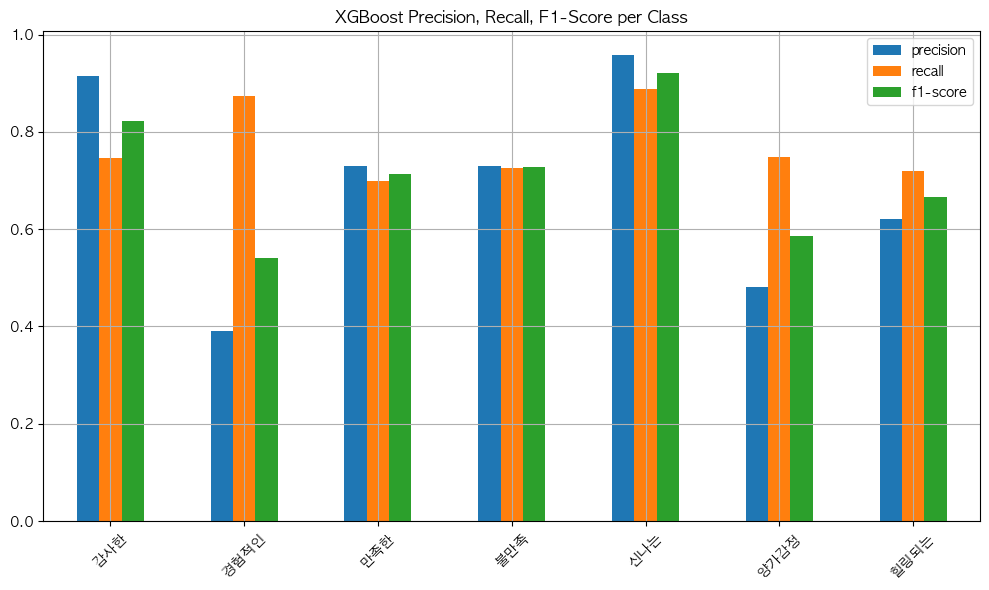

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# 1. XGBoost 모델 예측 (숫자 예측값을 원래의 문자열 레이블로 변환)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)  # 숫자 -> 문자열로 변환

# 2. 성능 보고서 생성 (딕셔너리로 출력)
report_xgb = classification_report(y_test, y_pred_xgb_decoded, output_dict=True)

# 3. DataFrame으로 변환
report_df = pd.DataFrame(report_xgb).transpose()

# 4. 각 성능 지표의 막대 그래프 그리기
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(10,6))

# 그래프 제목 및 설정
plt.title('XGBoost Precision, Recall, F1-Score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

In [100]:
print("### XGBoost 결과 ###")
print(f"정확도: {accuracy_xgb}")
print("분류 보고서:\n", report_xgb)

### XGBoost 결과 ###
정확도: 0.7443270127447933
분류 보고서:
 {'감사한': {'precision': 0.9137042062415197, 'recall': 0.7470601286887064, 'f1-score': 0.822021484375, 'support': 9014.0}, '경험적인': {'precision': 0.3904202440126525, 'recall': 0.8744939271255061, 'f1-score': 0.5398313027179007, 'support': 988.0}, '만족한': {'precision': 0.7292485549132948, 'recall': 0.6980965028773793, 'f1-score': 0.7133325794413661, 'support': 4518.0}, '불만족': {'precision': 0.7288461538461538, 'recall': 0.7246653919694073, 'f1-score': 0.7267497603068073, 'support': 1046.0}, '신나는': {'precision': 0.9585798816568047, 'recall': 0.8871851040525739, 'f1-score': 0.9215017064846417, 'support': 913.0}, '양가감정': {'precision': 0.48175965665236054, 'recall': 0.7483333333333333, 'f1-score': 0.5861618798955613, 'support': 600.0}, '힐링되는': {'precision': 0.6201008925106714, 'recall': 0.7188484030589294, 'f1-score': 0.6658333333333334, 'support': 2223.0}, 'accuracy': 0.7443270127447933, 'macro avg': {'precision': 0.6889513699762082, 'recall': 

In [101]:
# 임의의 문장을 넣고 XGBoost 모델로 감정을 예측하는 코드
def predict_emotion(input_text, model, vectorizer, label_encoder):
    # 입력 문장을 리스트로 만들어 TF-IDF 변환
    input_text_transformed = vectorizer.transform([input_text])

    # XGBoost 모델을 사용해 감정 예측 (숫자로 예측됨)
    predicted_label_encoded = model.predict(input_text_transformed)

    # 숫자 예측값을 원래 레이블로 변환
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

    return predicted_label[0]  # 예측된 감정 반환

# 예측할 문장 입력
test_sentence = "전반적으로 만족스러웠습니다. 다만 위치가 너무 외져서 주변에 아무것도 없는건 좀 아쉬웠어요"

# 예측 실행
predicted_emotion = predict_emotion(test_sentence, xgb_model, vectorizer, label_encoder)

# 예측 결과 출력
print(f"입력 문장: {test_sentence}")
print(f"예측된 감정: {predicted_emotion}")

입력 문장: 전반적으로 만족스러웠습니다. 다만 위치가 너무 외져서 주변에 아무것도 없는건 좀 아쉬웠어요
예측된 감정: 양가감정


# Bert


In [130]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

# 데이터 로드
data = pd.read_csv('/Users/jeon-yewon/Downloads/증강된_데이터_1008.csv')

# 'Unknown' 값을 가진 행은 제거
data = data[data['감정'] != 'Unknown']

# 리뷰 데이터를 문자열로 변환
data['리뷰_교정'] = data['리뷰_교정'].astype(str)

# 라벨 매핑 (감정 데이터를 숫자 레이블로 변환)
label_map = {
    '감사한': 0,
    '만족한': 1,
    '힐링되는': 2,
    '경험적인': 3,
    '신나는': 4,
    '양가감정': 5,
    '불만족': 6
}

# 라벨을 숫자로 변환
data['labels'] = data['감정'].map(label_map)

In [131]:
# BERT 토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# 텍스트를 토큰화하는 함수 정의
def tokenize_function(examples):
    return tokenizer(examples['리뷰_교정'], padding='max_length', truncation=True, max_length=128)

# 데이터셋을 Hugging Face Dataset으로 변환
dataset = Dataset.from_pandas(data[['리뷰_교정', 'labels']])

In [132]:
# 토크나이징 적용
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 데이터셋을 학습과 검증 데이터로 분할
train_test_split = tokenized_datasets.train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
val_dataset = train_test_split['test']

Map:   0%|          | 0/97729 [00:00<?, ? examples/s]

In [133]:
# BERT 모델 불러오기
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(label_map))

# 학습 설정
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual

In [ ]:
# Trainer 설정
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # 학습 데이터셋
    eval_dataset=val_dataset      # 검증 데이터셋
)

# 모델 학습
trainer.train()

In [18]:
def predict_question(question):
    inputs = tokenizer(question, return_tensors="pt", padding=True, truncation=True, max_length=128)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    
    predicted_label = label_encoder.inverse_transform([predicted_class])
    
    return predicted_label[0]

test_sentence = "호스트님께서 도움을 많이 주셔서 감사했어요. 공항까지 데려다주셨고 하루종일 감사한게 너무 많았습니다. 감사합니다."

print(f"입력 문장: {test_sentence}")
print(f"예측된 감정: {label_map[predicted_class_id]}")

입력 문장: 호스트님께서 도움을 많이 주셔서 감사했어요. 공학까지 데려다주셨고 하루종일 감사한게 너무 많았습니다. 감사합니다.
예측된 감정: 만족한
